# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости.

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

Представелнный датасет сожержит колонки:

- DateCrawled  дата скачивания анкеты из базы
- VehicleType тип автомобильного кузов
- RegistrationYear год регистрации автомобя
- 
Gear  тип коробки ередач
- Power мощность (л.с.)
- Model модель авто
- Kilometer пробег (км)
- RegistrationMonth месяц регистрации автомобиля
- FuelType тип топлива
- Brand марка автомобиля
- Repaired была машина в ремонте или нет
- DateCreated дата создания анкеты
- NumberOfPictures количество фотографий автомобиля
- LastSeen дата последней активности пользователя
- Price - цена (евро)

**План работ:**
- Изучений файа с даннымии
- Предобработка и исследовательский анализ данники
- Разработка модел
- Выбор наилучшей модели по критериям заказчикаента

## Подготовка данных

In [1]:
!pip install lightgbm

In [2]:
# импортируем основные библиотеки
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor
)
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler
)

from sklearn.model_selection import (
    RandomizedSearchCV,
    train_test_split
)

In [3]:
# загрузим данные 
try:
    data = pd.read_csv('/datasets/autos.csv')
except:
    data = pd.read_csv('autos.csv')

In [4]:
display(data)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


In [5]:
def base_analizez(data):
    '''функция для изучения датасета'''

    print('Просмотр датасета:')
    display(data.head())

    print('\n')
    print('Общая информация об датасете:')
    print(data.info())

    print('\n')
    print('Проверка на наличие значений nan в датасете:')
    display(pd.DataFrame(round(
        data.isna().mean()*100,)).style.background_gradient('coolwarm'))


In [6]:
base_analizez(data)

Просмотр датасета:


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21




Общая информация об датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  

,0
DateCrawled,0.000000
Price,0.000000
VehicleType,11.000000
RegistrationYear,0.000000
Gearbox,6.000000
Power,0.000000
Model,6.000000
Kilometer,0.000000
RegistrationMonth,0.000000
FuelType,9.000000


**Вывод:** В датасете 354368 строчки. Присутствует большое количество пропусков в данных.

<a id='change_1'></a>

In [7]:
# удалим значения с 6% пропусками
data = data.dropna(subset=['Model', 'Gearbox'])
data.loc[data['Repaired'].isna()] = data.loc[data['Repaired'].isna()].fillna('unknown')


In [8]:
# т.к. оставшиеся колонки типа object приведем их к единому виду
data['VehicleType'] = data['VehicleType'].str.lower()
data['FuelType'] = data['FuelType'].str.lower()
data['Repaired'] = data['Repaired'].str.lower()

In [9]:
def unique_for(data, columns: [int, str]):
    '''Просмотр всех уникальных значений в колонке'''
    print('Уникальные значения', columns)
    uniq = []
    for i in data[columns].unique():
        uniq.append(i)
    try:
        print(sorted(uniq))
    except:
        print(uniq)
    print()


In [10]:
unique_for(data, 'VehicleType')
unique_for(data, 'FuelType')
unique_for(data, 'Repaired')

Уникальные значения VehicleType
['unknown', 'suv', 'small', 'sedan', 'convertible', 'bus', 'wagon', 'coupe', nan, 'other']

Уникальные значения FuelType
['petrol', 'gasoline', 'unknown', nan, 'lpg', 'other', 'hybrid', 'cng', 'electric']

Уникальные значения Repaired
['no', 'unknown', 'yes']



In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318962 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        318962 non-null  object
 1   Price              318962 non-null  int64 
 2   VehicleType        305641 non-null  object
 3   RegistrationYear   318962 non-null  int64 
 4   Gearbox            318962 non-null  object
 5   Power              318962 non-null  int64 
 6   Model              318962 non-null  object
 7   Kilometer          318962 non-null  int64 
 8   RegistrationMonth  318962 non-null  int64 
 9   FuelType           306629 non-null  object
 10  Brand              318962 non-null  object
 11  Repaired           318962 non-null  object
 12  DateCreated        318962 non-null  object
 13  NumberOfPictures   318962 non-null  int64 
 14  PostalCode         318962 non-null  int64 
 15  LastSeen           318962 non-null  object
dtypes: int64(7), object(

In [12]:
# заменим пустые значения на основании первого уникального значения
# для данной модели авто
to_change_columns = ['VehicleType', 'FuelType']

for i in data['Model'].unique():
    for x in to_change_columns:
        data.loc[(data['Model'] == i) & (data[x].isna()), x] = \
        data.loc[(data['Model'] == i), x].unique()[0]

In [13]:
base_analizez(data)

Просмотр датасета:


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,unknown,1993,manual,0,golf,150000,0,petrol,volkswagen,unknown,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07




Общая информация об датасете:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 318962 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        318962 non-null  object
 1   Price              318962 non-null  int64 
 2   VehicleType        318782 non-null  object
 3   RegistrationYear   318962 non-null  int64 
 4   Gearbox            318962 non-null  object
 5   Power              318962 non-null  int64 
 6   Model              318962 non-null  object
 7   Kilometer          318962 non-null  int64 
 8   RegistrationMonth  318962 non-null  int64 
 9   FuelType           318674 non-null  object
 10  Brand              318962 non-null  object
 11  Repaired           318962 non-null  object
 12  DateCreated        318962 non-null  object
 13  NumberOfPictures   318962 non-null  int64 
 14  PostalCode         318962 non-null  int64 
 15  LastSeen           318962 non-null  

,0
DateCrawled,0.000000
Price,0.000000
VehicleType,0.000000
RegistrationYear,0.000000
Gearbox,0.000000
Power,0.000000
Model,0.000000
Kilometer,0.000000
RegistrationMonth,0.000000
FuelType,0.000000


In [14]:
# появился 1% пустых значений и ментше. Удалим их
data = data.dropna(subset=['VehicleType'])
data = data.dropna(subset=['FuelType'])

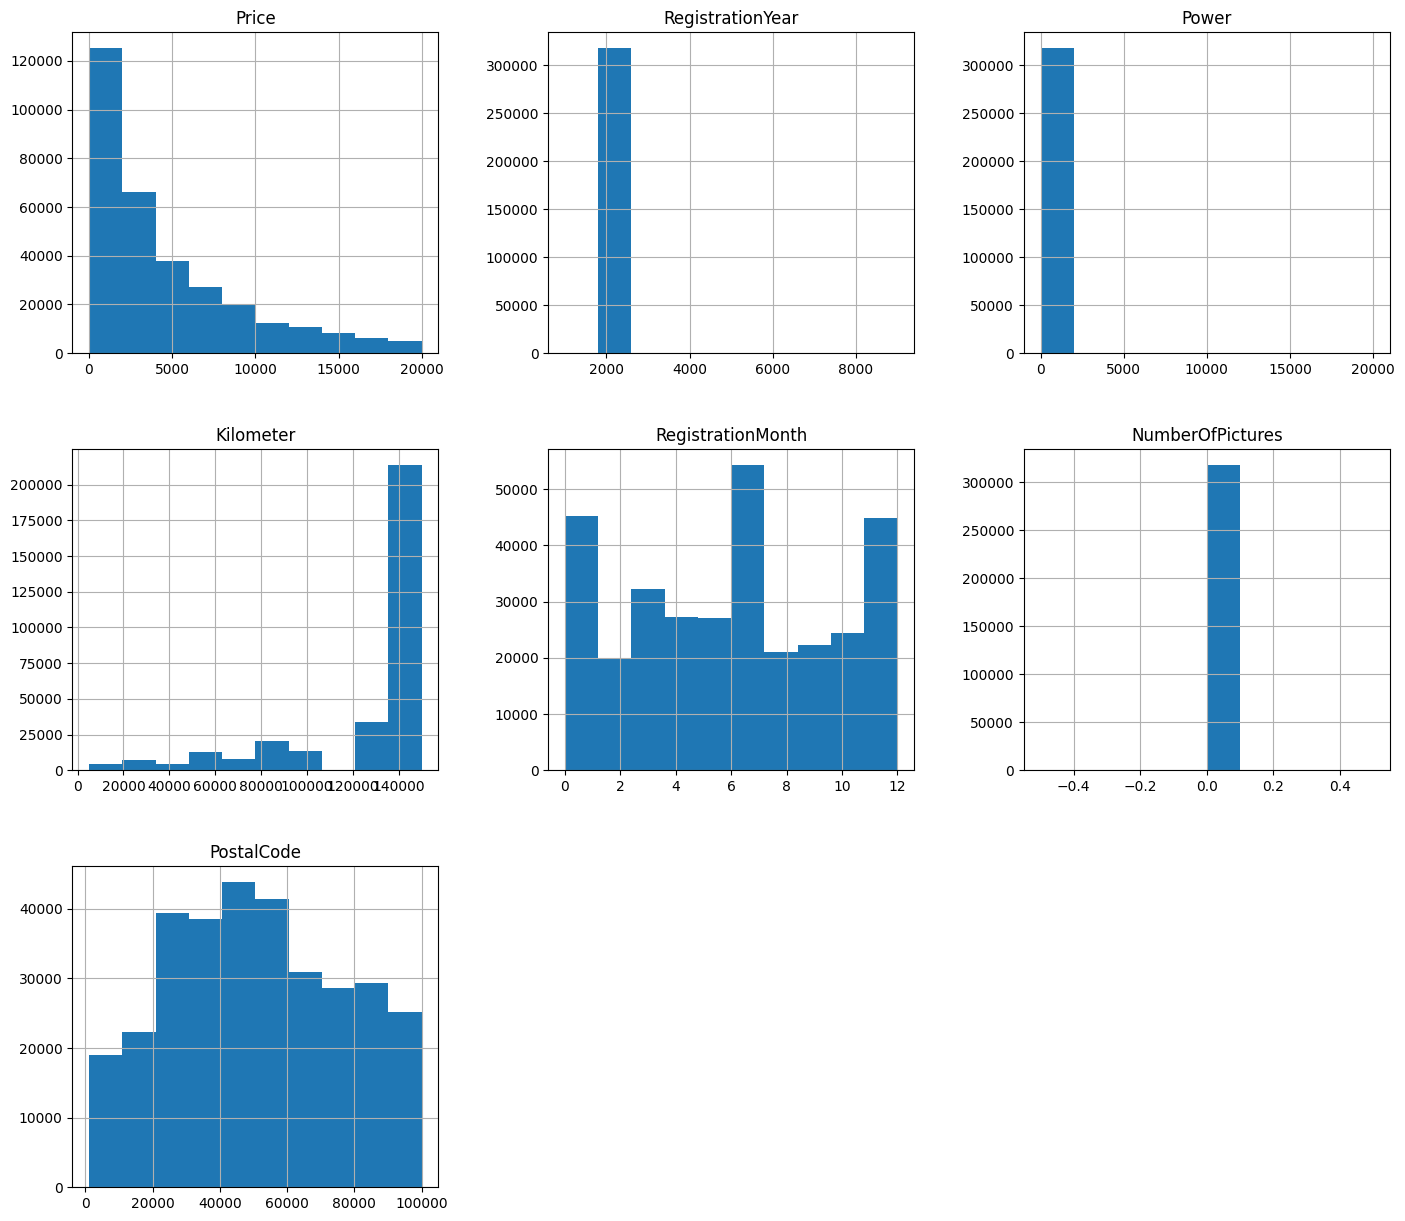

In [15]:
# просмотрим основное распределение значений
data.hist(figsize = (17,15))
plt.show()

In [16]:
# изменим формат времени в ячейках даты
data['DateCreated'] = pd.to_datetime(data['DateCreated'],
                                             format='%Y-%m-%dT').dt.date

data['LastSeen'] = pd.to_datetime(data['LastSeen'],
                                             format='%Y-%m-%dT').dt.date

data['DateCrawled'] = pd.to_datetime(data['DateCrawled'],
                                             format='%Y-%m-%dT').dt.date

# изменим формат времени в ячейках даты на object
data['DateCreated'] = data['DateCreated'].astype('object')

data['LastSeen'] = data['LastSeen'].astype('object')

data['DateCrawled'] = data['DateCrawled'].astype('object')

In [17]:
data.head(5)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24,480,unknown,1993,manual,0,golf,150000,0,petrol,volkswagen,unknown,2016-03-24,0,70435,2016-04-07
2,2016-03-14,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown,2016-03-14,0,90480,2016-04-05
3,2016-03-17,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17
4,2016-03-31,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06
5,2016-04-04,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04,0,33775,2016-04-06


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318511 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        318511 non-null  object
 1   Price              318511 non-null  int64 
 2   VehicleType        318511 non-null  object
 3   RegistrationYear   318511 non-null  int64 
 4   Gearbox            318511 non-null  object
 5   Power              318511 non-null  int64 
 6   Model              318511 non-null  object
 7   Kilometer          318511 non-null  int64 
 8   RegistrationMonth  318511 non-null  int64 
 9   FuelType           318511 non-null  object
 10  Brand              318511 non-null  object
 11  Repaired           318511 non-null  object
 12  DateCreated        318511 non-null  object
 13  NumberOfPictures   318511 non-null  int64 
 14  PostalCode         318511 non-null  int64 
 15  LastSeen           318511 non-null  object
dtypes: int64(7), object(

In [19]:
# выберем все числовые колонки
num_columns = data.select_dtypes(exclude= object).columns.to_list()
num_columns

['Price',
 'RegistrationYear',
 'Power',
 'Kilometer',
 'RegistrationMonth',
 'NumberOfPictures',
 'PostalCode']

In [20]:
# выберем все числовые колонки
object_columns = data.select_dtypes(include = object).columns.to_list()
object_columns

['DateCrawled',
 'VehicleType',
 'Gearbox',
 'Model',
 'FuelType',
 'Brand',
 'Repaired',
 'DateCreated',
 'LastSeen']

Распределение Price


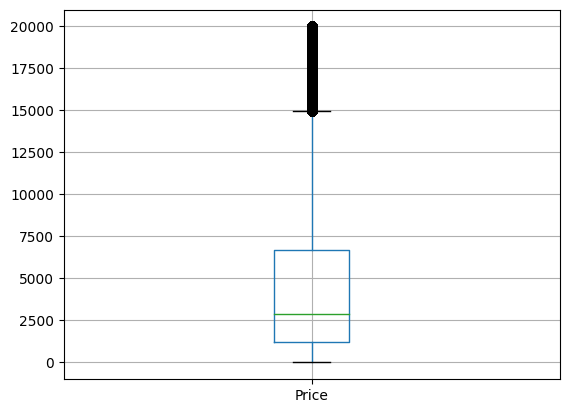

Распределение RegistrationYear


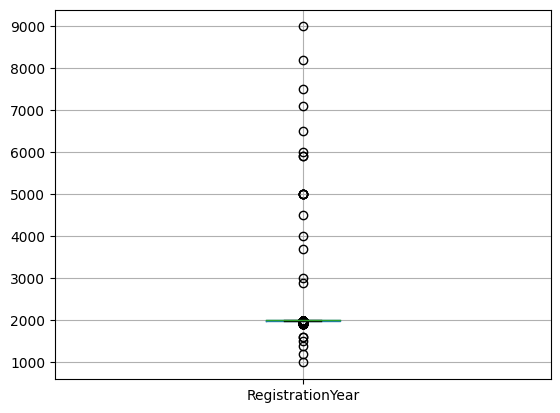

Распределение Power


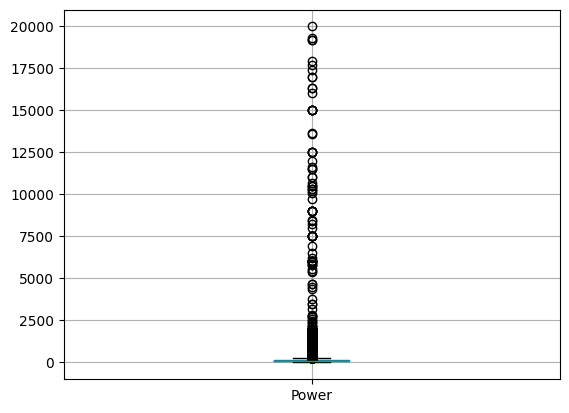

Распределение Kilometer


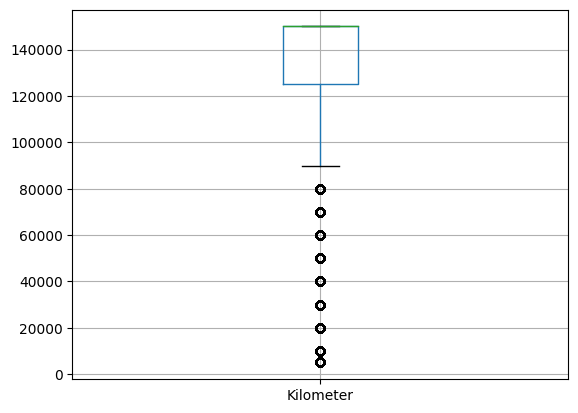

Распределение RegistrationMonth


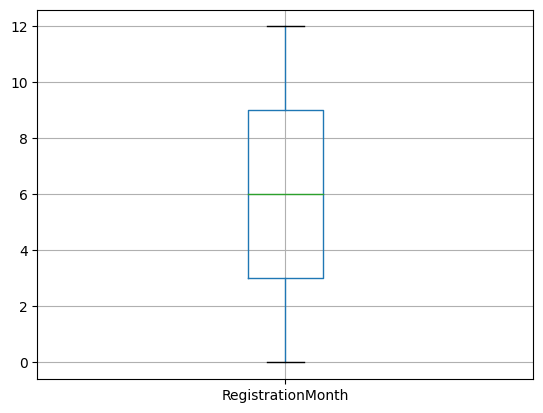

Распределение NumberOfPictures


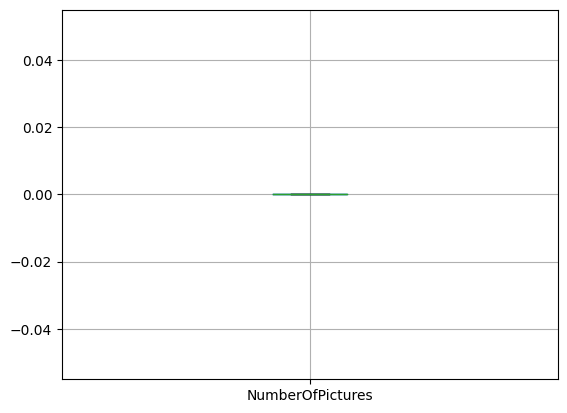

Распределение PostalCode


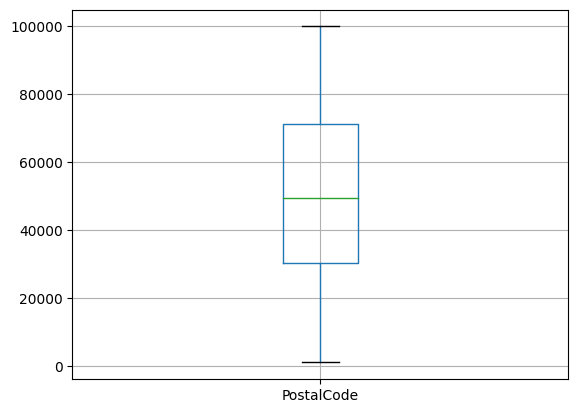

In [21]:
# построим распределение значений
for i in num_columns:
    print('Распределение', i)
    data.boxplot(i)
    plt.show()

In [22]:
# просмотр уникальных значений
for i in num_columns:
    unique_for(data, i)

Уникальные значения Price
[0, 1, 2, 3, 5, 7, 9, 10, 11, 13, 15, 16, 17, 20, 24, 25, 26, 29, 30, 33, 35, 39, 40, 45, 47, 49, 50, 55, 59, 60, 65, 66, 69, 70, 74, 75, 77, 79, 80, 85, 89, 90, 95, 98, 99, 100, 101, 105, 108, 110, 111, 112, 115, 117, 119, 120, 122, 123, 125, 126, 127, 128, 129, 130, 132, 133, 135, 139, 140, 142, 145, 149, 150, 155, 156, 157, 159, 160, 162, 165, 166, 169, 170, 173, 175, 179, 180, 181, 185, 188, 189, 190, 192, 193, 195, 196, 198, 199, 200, 202, 205, 209, 210, 211, 215, 217, 219, 220, 222, 224, 225, 229, 230, 235, 236, 238, 240, 243, 245, 248, 249, 250, 251, 252, 253, 255, 259, 260, 261, 263, 265, 266, 269, 270, 272, 273, 274, 275, 277, 278, 279, 280, 281, 284, 285, 288, 289, 290, 293, 295, 298, 299, 300, 301, 305, 308, 309, 310, 315, 316, 319, 320, 321, 323, 325, 329, 330, 331, 332, 333, 335, 338, 339, 340, 341, 344, 345, 348, 349, 350, 355, 356, 359, 360, 365, 366, 368, 369, 370, 373, 375, 377, 378, 379, 380, 384, 385, 388, 389, 390, 393, 395, 397, 398, 399, 

In [23]:
unique_for(data, 'VehicleType')

Уникальные значения VehicleType
['bus', 'convertible', 'coupe', 'other', 'sedan', 'small', 'suv', 'unknown', 'wagon']



In [24]:
# просмотр уникальных object
for i in object_columns:
    unique_for(data, i)

Уникальные значения DateCrawled
[datetime.date(2016, 3, 5), datetime.date(2016, 3, 6), datetime.date(2016, 3, 7), datetime.date(2016, 3, 8), datetime.date(2016, 3, 9), datetime.date(2016, 3, 10), datetime.date(2016, 3, 11), datetime.date(2016, 3, 12), datetime.date(2016, 3, 13), datetime.date(2016, 3, 14), datetime.date(2016, 3, 15), datetime.date(2016, 3, 16), datetime.date(2016, 3, 17), datetime.date(2016, 3, 18), datetime.date(2016, 3, 19), datetime.date(2016, 3, 20), datetime.date(2016, 3, 21), datetime.date(2016, 3, 22), datetime.date(2016, 3, 23), datetime.date(2016, 3, 24), datetime.date(2016, 3, 25), datetime.date(2016, 3, 26), datetime.date(2016, 3, 27), datetime.date(2016, 3, 28), datetime.date(2016, 3, 29), datetime.date(2016, 3, 30), datetime.date(2016, 3, 31), datetime.date(2016, 4, 1), datetime.date(2016, 4, 2), datetime.date(2016, 4, 3), datetime.date(2016, 4, 4), datetime.date(2016, 4, 5), datetime.date(2016, 4, 6), datetime.date(2016, 4, 7)]

Уникальные значения Vehicl

In [25]:
# удалим аномальные значения
data = data.loc[(data['Power']<= 1000) & (data['Power'] >= 1)]
data = data.loc[(data['RegistrationYear'] >= 1900) & (data['RegistrationYear'] <= 2016)]
data = data.loc[(data['Price'] >= 100)]
data = data.loc[(data['RegistrationMonth'] >= 1)]


In [26]:
def matrix_cor(data):
    '''функция создания матрицы корреляции'''
    plt.figure(figsize = (15,15))
    sns.set(font_scale = 1.4)
    cor_matrix = round(data.corr(),2)
    sns.heatmap(cor_matrix, annot = True, linewidths = .5, cmap = 'coolwarm')

    plt.title("Матрица корреляции числовых признаков")
    plt.show()

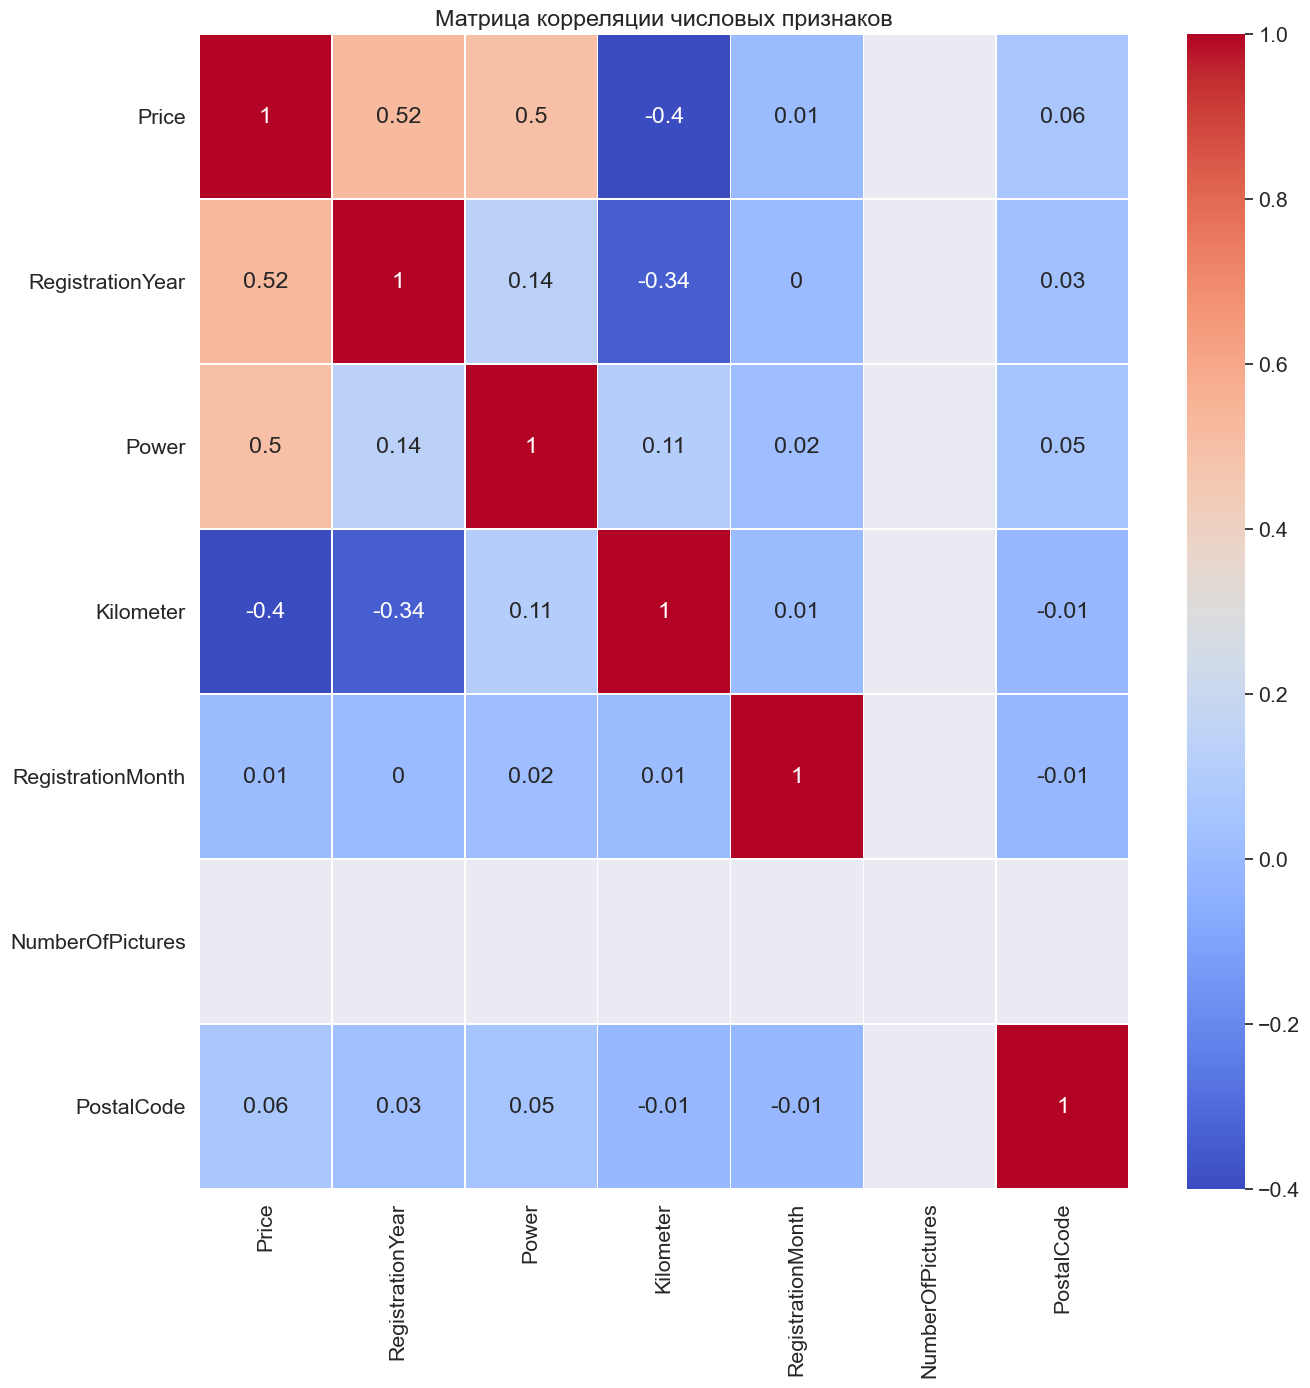

In [27]:
# матрица корреляции
matrix_cor(data)

In [28]:
# удалим излишние данные для модели
data = data.drop(['DateCrawled',  'DateCreated', 'PostalCode', 'LastSeen', 'NumberOfPictures'], axis = 1)


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265203 entries, 2 to 354368
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              265203 non-null  int64 
 1   VehicleType        265203 non-null  object
 2   RegistrationYear   265203 non-null  int64 
 3   Gearbox            265203 non-null  object
 4   Power              265203 non-null  int64 
 5   Model              265203 non-null  object
 6   Kilometer          265203 non-null  int64 
 7   RegistrationMonth  265203 non-null  int64 
 8   FuelType           265203 non-null  object
 9   Brand              265203 non-null  object
 10  Repaired           265203 non-null  object
dtypes: int64(5), object(6)
memory usage: 24.3+ MB


In [30]:
# КОД РЕВЬЮЕРА
data.Repaired.isna().sum()

0

In [31]:
# КОД РЕВЬЮЕРА
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth
count,265203.000000,265203.000000,265203.000000,265203.000000,265203.000000
mean,5081.906200,2003.089984,121.742088,127873.817415,6.383506
std,4663.494163,6.254440,54.183576,36678.152023,3.349092
min,100.000000,1910.000000,1.000000,5000.000000,1.000000
25%,1499.000000,1999.000000,80.000000,125000.000000,3.000000
50%,3499.000000,2003.000000,115.000000,150000.000000,6.000000
75%,7400.000000,2007.000000,150.000000,150000.000000,9.000000
max,20000.000000,2016.000000,1000.000000,150000.000000,12.000000


In [32]:
# КОД РЕВЬЮЕРА
data.duplicated().sum()

22375

In [33]:
data.shape[0]

265203

In [34]:
data = data.drop_duplicates()

In [35]:
data.shape[0]

242828

**Вывод:** Были удалены пропуски в датасете и излишние колонки, которые в дальнейшем могли перегрузить модель признаками. После всех манипуляция датасет составляет 242828 строчку. Целенаправлено не были заполнены пустые значения в Repaired т.к. это значмый фактор для образования цены. Так же не были удалены автомобили с датой регистрации 1900 и более годов, и автомобили с экстримально минимальной ценой. Удалены дубликаты из датсета

## Обучение моделей

In [36]:
# глобальная переменныя
RANDOM = 12345

In [37]:
# делим датасет на признаки и таргет
features = data.drop('Price', axis = 1)
target = data['Price']


In [38]:
# деление на обучающую выборку
features_train, features_valid, target_train, target_valid = train_test_split(
features, target, test_size=0.40, random_state = RANDOM, shuffle = False)

In [39]:
# деление на валидационную и тестовую выборку
features_valid, features_test, target_valid, target_test = train_test_split(
features_valid, target_valid, test_size=0.30, random_state = RANDOM)

In [40]:
print(features_train.shape[0], features_valid.shape[0], features_test.shape[0])

145696 67992 29140


In [41]:
# целочисленные признаки
num_features = features_train.select_dtypes(exclude=object).columns.to_list()
num_features

['RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth']

In [42]:
# вещественные признаки
ohe_features = features_train.select_dtypes(include=object).columns.to_list()
ohe_features

['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']

In [43]:
%%time
# get_feature_names_out
# кодирование данных техникой OHE
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='error',sparse=False )

# обучаем энкодер
encoder_ohe.fit(features_train[ohe_features])

# добавляем закодированные признаки датасет
features_train[
        encoder_ohe.get_feature_names()
    ] = encoder_ohe.transform(features_train[ohe_features])

# удаляем незакодированные категориальные признаки
features_train = features_train.drop(ohe_features, axis=1)

#скелер
scaler = StandardScaler()

# обучаем его
features_train[num_features] = scaler.fit_transform(features_train[num_features])


CPU times: total: 6.62 s
Wall time: 6.87 s


In [44]:
# энкодером, который обучен на тренировочной выборке, кодируем валидационную
features_valid[
        encoder_ohe.get_feature_names()
    ] = encoder_ohe.transform(features_valid[ohe_features])

features_valid = features_valid.drop(ohe_features, axis=1)

# скелером масштабируем тестовую
features_valid[num_features] = scaler.transform(
        features_valid[num_features])


In [45]:
# энкодером, который обучен на тренировочной выборке, кодируем тестовую
features_test[
        encoder_ohe.get_feature_names()
    ] = encoder_ohe.transform(features_test[ohe_features])

features_test = features_test.drop(ohe_features, axis=1)

features_test[num_features] = scaler.transform(
        features_test[num_features])

In [46]:
%%time
'''линейная регрессия обучение'''

# модель
model_lr = LinearRegression()

# комбинаций гиперпараметров
param_grid = {
    'fit_intercept': [False, True],
    'copy_X': [False, True],
    'n_jobs': [-1, 0, 1],
    }

# подбор гиперпараметров
rs_lr = RandomizedSearchCV(
    model_lr,
    param_distributions=param_grid,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    random_state=RANDOM
    )

# фит модели
rs_lr.fit(features_train, target_train)

# лучшие параметры
try:
    print('fbest_params:', {rs_lr.best_params_})
except:
    print('fbest_params:', dict(rs_lr.best_params_))


fbest_params: {'n_jobs': -1, 'fit_intercept': True, 'copy_X': False}
CPU times: total: 4.94 s
Wall time: 1min 10s


In [47]:
'''линейная регрессия предсказание'''

prediction_lr = rs_lr.predict(features_valid)

# RMSE
RMSE_lr = mean_squared_error(target_valid, prediction_lr, squared=False)

# словарь с временем модели 
time_lr = []

# среднее время обучения
time_lr.append(rs_lr.cv_results_['mean_fit_time'].mean())

# среднее время опредсказания
time_lr.append(rs_lr.cv_results_['mean_score_time'].mean())


In [48]:
%%time
'''Случайный лес обучение'''
# модель
model_RF = RandomForestRegressor(random_state = RANDOM)

# комбинаций гиперпараметров
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5],
    }

# подбор гиперпараметров
rs_rf = RandomizedSearchCV(
    model_RF,
    param_distributions=param_grid,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    random_state=RANDOM
    )

# фит модели
rs_rf.fit(features_train, target_train)

# лучшие параметры
try:
    print('fbest_params:', {rs_rf.best_params_})
except:
    print('fbest_params:', dict(rs_rf.best_params_))


fbest_params: {'n_estimators': 100, 'max_depth': None}
CPU times: total: 3min 10s
Wall time: 8min 15s


In [49]:
'''Случайный лес предсказание'''

prediction_rf = rs_rf.predict(features_valid)

# RMSE
RMSE_rf = mean_squared_error(target_valid, prediction_rf, squared=False)

# словарь с временем модели 
time_rf = []

# среднее время обучения
time_rf.append(rs_rf.cv_results_['mean_fit_time'].mean())

# среднее время опредсказания
time_rf.append(rs_rf.cv_results_['mean_score_time'].mean())


In [50]:
%%time
'''GradientBoosting обучение'''

# модель
model_GB = GradientBoostingRegressor(random_state = RANDOM)

 # комбинаций гиперпараметров
param_grid = {
        'n_estimators': [100, 200],
        'criterion': ['friedman_mse', 'squared_error'],
        'learning_rate': np.arange(0.1, 1, 0.2),
        'max_depth': [x for x in range(1,6)]
    }

# подбор гиперпараметров
rs_GB = RandomizedSearchCV(
        model_GB,
        param_distributions=param_grid,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1,
        random_state=RANDOM)

# фит модели
rs_GB.fit(features_train, target_train)

# лучшие параметры
try:
    print('fbest_params:', {rs_GB.best_params_})
except:
    print('fbest_params:', dict(rs_GB.best_params_))

fbest_params: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.7000000000000001, 'criterion': 'friedman_mse'}
CPU times: total: 1min 45s
Wall time: 5min 46s


In [51]:
'''GradientBoosting предсказание'''

prediction_gb = rs_GB.predict(features_valid)

# RMSE
RMSE_gb = mean_squared_error(target_valid, prediction_gb, squared=False)

# словарь с временем модели 
time_gb = []

# среднее время обучения
time_gb.append(rs_GB.cv_results_['mean_fit_time'].mean())

# среднее время опредсказания
time_gb.append(rs_GB.cv_results_['mean_score_time'].mean())


In [52]:
%%time
'''CatBoostRegressor обучение'''

model_CB = CatBoostRegressor()

# комбинаций гиперпараметров
param_grid = {
      'eval_metric': ['MAPE', 'RMSE' ],
      'iterations':[1000, 2000],
    }

# подбор гиперпараметров
rs_CB = RandomizedSearchCV(
        model_CB,
        param_distributions=param_grid,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1,
        random_state=RANDOM,
        pre_dispatch = 4
    )
# фит модели
rs_CB.fit(features_train, target_train)

# лучшие параметры
try:
    print('fbest_params:', {rs_CB.best_params_})
except:
  print('fbest_params:', dict(rs_CB.best_params_))


Learning rate set to 0.0512
0:	learn: 2.2402392	total: 162ms	remaining: 5m 24s
1:	learn: 2.1618543	total: 170ms	remaining: 2m 50s
2:	learn: 2.0902180	total: 178ms	remaining: 1m 58s
3:	learn: 2.0216645	total: 185ms	remaining: 1m 32s
4:	learn: 1.9526060	total: 193ms	remaining: 1m 16s
5:	learn: 1.8916287	total: 201ms	remaining: 1m 6s
6:	learn: 1.8326149	total: 210ms	remaining: 59.7s
7:	learn: 1.7746475	total: 217ms	remaining: 54.1s
8:	learn: 1.7179372	total: 225ms	remaining: 49.8s
9:	learn: 1.6652527	total: 232ms	remaining: 46.2s
10:	learn: 1.6180198	total: 239ms	remaining: 43.3s
11:	learn: 1.5709076	total: 247ms	remaining: 40.8s
12:	learn: 1.5252914	total: 254ms	remaining: 38.8s
13:	learn: 1.4813384	total: 262ms	remaining: 37.1s
14:	learn: 1.4390357	total: 270ms	remaining: 35.7s
15:	learn: 1.4010477	total: 277ms	remaining: 34.4s
16:	learn: 1.3606037	total: 285ms	remaining: 33.3s
17:	learn: 1.3249849	total: 294ms	remaining: 32.4s
18:	learn: 1.2893569	total: 302ms	remaining: 31.5s
19:	lear

In [53]:
'''CatBoostRegressor предсказание'''

prediction_cb = rs_CB.predict(features_valid)

# RMSE
RMSE_cb = mean_squared_error(target_valid, prediction_cb, squared=False)

# словарь с временем модели 
time_сb = []

# среднее время обучения
time_сb.append(rs_CB.cv_results_['mean_fit_time'].mean())

# среднее время опредсказания
time_сb.append(rs_CB.cv_results_['mean_score_time'].mean())


In [54]:
%%time
'''LGBMRegressor обучение'''

model_lgb = LGBMRegressor(random_state = RANDOM)

# комбинаций гиперпараметров
param_grid = {
        'num_leaves': [10, 20, 31, 70],
        'learning_rate': [0.05, 0.1, 0.5],
        'n_estimators': [20, 100, 500, 1000],
    }

# подбор гиперпараметров
rs_lgb = RandomizedSearchCV(
        model_lgb,
        param_distributions=param_grid,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1,
        random_state=RANDOM
    )

# фит модели
rs_lgb .fit(features_train, target_train)

# лучшие параметры
try:
  print('fbest_params:', {rs_lgb.best_params_})
except:
  print('fbest_params:', dict(rs_lgb.best_params_))



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 145696, number of used features: 284
[LightGBM] [Info] Start training from score 5083.556288
fbest_params: {'num_leaves': 70, 'n_estimators': 1000, 'learning_rate': 0.1}
CPU times: total: 15.3 s
Wall time: 53.4 s


In [55]:
'''LGBMRegressor предсказание'''

prediction_lgb = rs_lgb.predict(features_valid)

# RMSE
RMSE_lgb = mean_squared_error(target_valid, prediction_lgb, squared=False)

# словарь с временем модели 
time_lgb = []

# среднее время обучения
time_lgb.append(rs_lgb.cv_results_['mean_fit_time'].mean())

# среднее время опредсказания
time_lgb.append(rs_lgb.cv_results_['mean_score_time'].mean())


In [56]:
print("Результат LinearRegression")
print(f'Время обучения: {time_lr[0]} \nВремя предсказания: {time_lr[1]}')
print('RMSE = ', RMSE_lr)

Результат LinearRegression
Время обучения: 20.03179223537445 
Время предсказания: 0.1285187578201294
RMSE =  2570.529812641383


In [57]:
print("Результат Случайный лес")
print(f'Время обучения: {time_rf[0]} \nВремя предсказания: {time_rf[1]}')
print('RMSE = ', RMSE_rf)

Результат Случайный лес
Время обучения: 179.33650196790694 
Время предсказания: 0.48484977483749386
RMSE =  1656.6823076800597


In [58]:
print("Результат GradientBoosting")
print(f'Время обучения: {time_gb[0]} \nВремя предсказания: {time_gb[1]}')
print('RMSE = ', RMSE_gb)

Результат GradientBoosting
Время обучения: 58.763921999931334 
Время предсказания: 0.09031982421875
RMSE =  1662.4273696621258


In [59]:
print("Результат CatBoostRegressor")
print(f'Время обучения: {time_сb[0]} \nВремя предсказания: {time_сb[1]}')
print('RMSE = ', RMSE_cb)

Результат CatBoostRegressor
Время обучения: 19.095645654201505 
Время предсказания: 0.0849005103111267
RMSE =  1566.6275430482558


In [60]:
print("Результат LGBMRegressor")
print(f'Время обучения: {time_lgb[0]} \nВремя предсказания: {time_lgb[1]}')
print('RMSE = ', RMSE_lgb)

Результат LGBMRegressor
Время обучения: 13.540819077491761 
Время предсказания: 0.18773991107940674
RMSE =  1527.7553300256338


**Вывод:** Были обучены модели LinearRegression, RandomForest, GradientBoosting, CatBoostRegressor, LGBMRegressor. Самая долгая по вермени обучения модель была Случайный лес. Самая точная модель - LGBMRegressor. Из-за большого потребления ресурсов моделью CatBoostRegressor пришлось ограничить многопоточность, поэтому время обучения данной модели не совсем корректно.

## Анализ моделей

In [61]:
# создадим общий датасет с информацией о всех моделях
model_lst = ['LinearRegression', 'RandomForest','GradientBoosting', 'CatBoostRegressor', 'LGBMRegressor']

# время обучения
time_fit = [time_lr[0], time_rf[0], time_gb[0], time_сb[0], time_lgb[0]]

# время предсказания 
time_predict = [time_lr[1], time_rf[1], time_gb[1], time_сb[1], time_lgb[1]]

# RMSE
RMSE_lst = [RMSE_lr, RMSE_rf, RMSE_gb, RMSE_cb, RMSE_lgb] 

# создание датафрейма
data = {'name_model': model_lst, 'time_learn': time_fit,
    'time_predict': time_predict, 'RMSE': RMSE_lst}
data_total = pd.DataFrame(data = data)


In [62]:
display(data_total)

,name_model,time_learn,time_predict,RMSE
0,LinearRegression,20.031792,0.128519,2570.529813
1,RandomForest,179.336502,0.484850,1656.682308
2,GradientBoosting,58.763922,0.090320,1662.427370
3,CatBoostRegressor,19.095646,0.084901,1566.627543
4,LGBMRegressor,13.540819,0.187740,1527.755330


In [63]:
def show_db(column: str):
    '''Построение гистограмм'''
    data_total.plot('name_model', column, kind = 'bar', figsize = (10,5),
                     grid = True, rot = 15)
    plt.show()

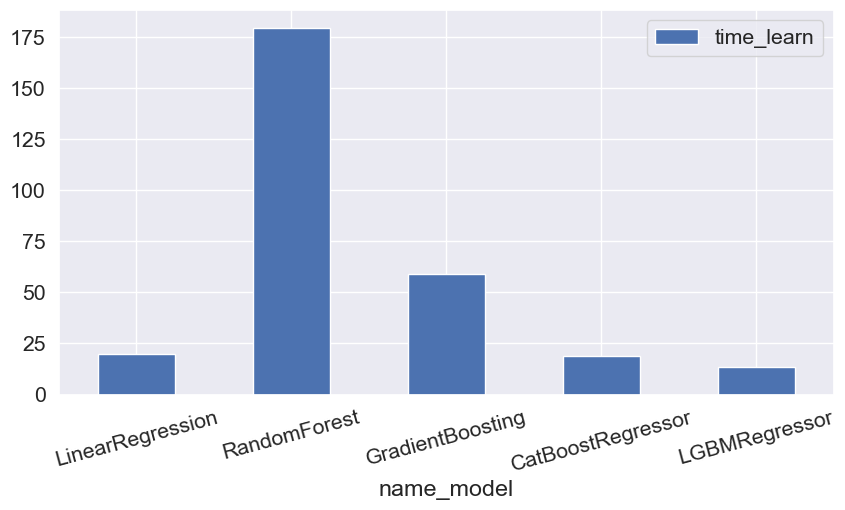

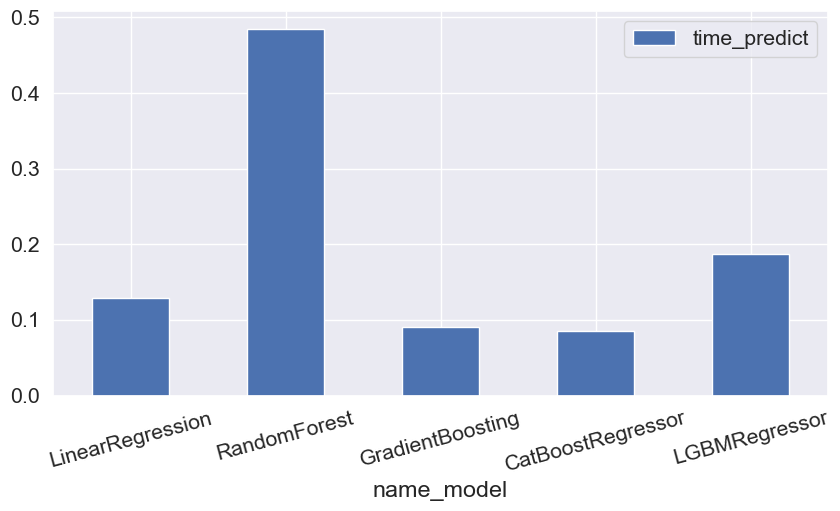

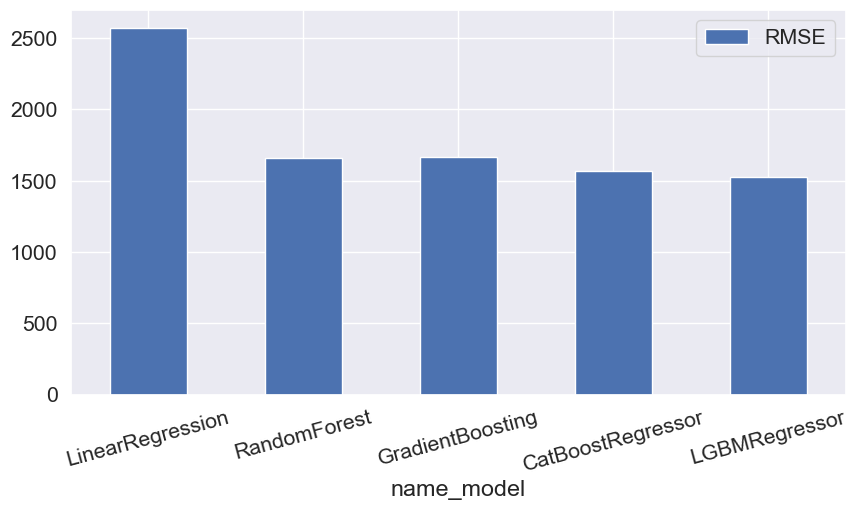

In [64]:
show_db('time_learn')
show_db('time_predict')
show_db('RMSE')


In [66]:
# тестирование лучшей модели на тестовой выборке
test_predict = rs_lgb.predict(features_test)
RMSE_test = mean_squared_error(target_test, test_predict, squared=False)
print('Результат лучшей модели:', RMSE_test)

Результат лучшей модели: 1530.6705315635236


**Вывод:** Тестирование лучшей модели показало что результат на валидационной выборке и тестовой практически идентичны. Модель не подвержена переобучению (или недообучению).

<div style="border:solid steelgreen 4px; padding: 20px; border-radius: 15px">
<h1>Итог:</h1>

>В ходе работы были выполнены следующие операции:
>>- Изучена общая информация о представленном датасете
>>- Изучены данные в предоставленных датасетах
>>- Подготовка датасета для обучения моделей МО
>>- Исслерезультаты работы различных моделей МО
>>- Выбрана лучшая модель под критерии заказчика


>В ходе исследования была выявлена самая лучшая модель для решения задачи предсказания стоимости автомобиля - LGBMRegressor. По критериям заказчика эта модель лучше всех подходит для поставленной задачи. Время обучения модели 51.8 секунд, 1 сек. пердсказание, RMSE = 1612.10